Перевод, разбор и комментари решения:

https://www.kaggle.com/kabure/predicting-credit-risk-model-pipeline/notebook

Благодарность автору:
https://www.kaggle.com/kabure/code

# Содержание:

**1. [Введение]** <br>
    - Описание данных <br>

**2. [Библиотеки]** <br>
    - Импорт библиотек <br>
    - Импорт данных <br>

**3. [Изучение данных]** <br>
    - 3.1 Поиск типа данных <br>
    - 3.2 Форма данных <br>
    - 3.3 Нулевые значения <br>
    - 3.4 Уникальные значения <br>
    - 3.5 Первые строки <br>

**4. [Визуализация данных]** <br>
    - 4.1 Составление графической и описательной информации <br>

**5. [Корреляция данных](# Correlation)** <br>
    - 5.1 Корреляционные данные <br>
    
**6. [Предварительная обработка]**<br>
    - 6.1 Импорт библиотек <br>
    - 6.2 Настройка X и Y <br>
    - 6.3 Разделение X и Y в обучении и тесте <br>
    
**7. 1 [Модель 1]** <br>
    - 7.1.1 Случайный лес <br>
    - 7.1.2 Определение качества <br>
    - 7.1.3 Кросс-валидация <br>
    
**7. 2 [Модель 2]** <br>
    - 7.2.1 Логистическая регрессия <br>
    - 7.2.2 Определение качества <br>
    - 7.2.3 Кросс-валидация <br>
    - 7.2.4 Кривая ROC<br>

<a id="Introduction"></a> <br>


# **1. Введение:**
<h2>О датасете</h2>
Исходный набор данных содержит 1000 записей с 20 категориальными / символическими атрибутами, подготовленными профессором Хофманном. В этом наборе данных каждая запись представляет человека, который берет кредит в банке. Каждый человек классифицируется как хороший или плохой кредитный риск в соответствии с набором атрибутов. Ссылка на исходный набор данных может быть найдена ниже.

<h2>Содержание датасета</h2>
Почти невозможно понять исходный набор данных из-за его сложности. Таким образом, автором написан небольшой скрипт на Python для преобразования его в читаемый CSV-файл. Несколько столбцов просто игнорируются, потому что, они либо не значимы для анализа, либо их описания неинформативны. Выбранные атрибуты:

<b>Age </b> (числовой) <br>
<b>Sex </b> (текст: мужчина, женщина) <br>
<b>Job </b> (числовой: 0 - неквалифицированный и нерезидент, 1 - неквалифицированный и резидент, 2 - квалифицированный, 3 - высококвалифицированный) <br>
<b>Housing</b> (текст: собственный, арендный или бесплатный) <br>
<b>Saving accounts</b> (текст - маленький, умеренный, довольно богатый, богатый) <br>
<b>Checking account </b> (числовой, в DM - немецкая марка) <br>
<b>Credit amount</b> (числовой, в DM) <br>
<b>Duration</b> (числовой, в месяце) <br>
<b>Purpose</b> (текст: автомобиль, мебель / оборудование, радио / ТВ, бытовая техника, ремонт, образование, бизнес, отдых / др. <br>
<b>Risk </b> (целевое значение - хороший или плохой риск) <br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="Librarys"></a> <br>

# **2. Библиотеки:**
- Импорт библиотек
- Импорт данных

In [3]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data1.csv",index_col=0)
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


<a id="Known"></a> <br>
# **Изучение данных** 
- 3.1 Поиск типа данных <br>
- 3.2 Форма данных <br>
- 3.3 Нулевые значения <br>
- 3.4 Уникальные значения <br>
- 3.5 Первые строки <br>

In [4]:
#Сколько данных отсутствует по указанным атрибутам, какие типы
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [5]:
#Уникальные значения
print(df_credit.nunique())
#Просмотр первых 10
df_credit.head()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# **4. Некоторые исследования:** <a id="Explorations"></a> <br>

- Начинаем с распределения колонки Age.
- Немного Seaborn 
- Пересечение колонок

<h2> Начнем просматривать целевую переменную и ее распределение </h2>

In [6]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename='grouped-bar')

I will try implement some interactive visuals in my Kernels, this will be the first, inspired in Alexader's Kernel and I will also continue implementing plotly and bokeh in my Kerne

Я попытаюсь реализовать некоторые интерактивные визуальные эффекты в своих ядрах, это будет первое, вдохновленное ядром Alexader'а, и я также продолжу реализовывать плотно и боке в своем ядре.

In [7]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
fig.show(renderer='colab')
#py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



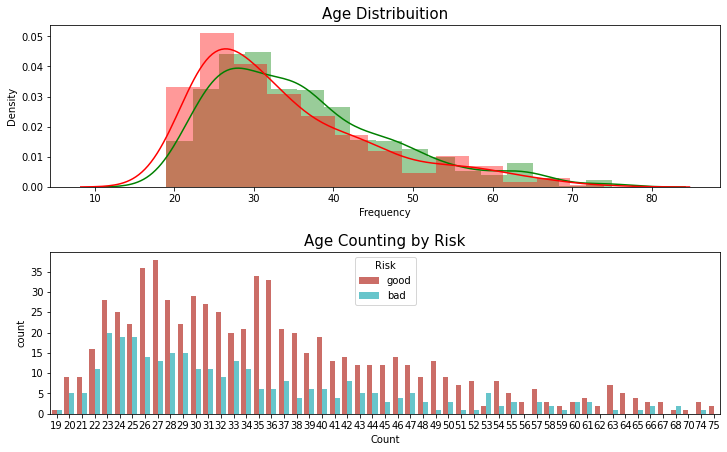

In [8]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

<h2>Создание категориальной переменной для обработки с помощью переменной Age </h2>

In [9]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [10]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename='box-age-cat')

Interesting distribuition

[Текст ссылки](https://)<h2>Сейчас я посмотрю распределение жилищных условий по возрастам I will now Look the distribuition of Housing own and rent by Risk</h2>


In [11]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Распределение по жилищным условиям'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename='Housing-Grouped')

мы можем видеть, что жилищная собственность и хороший риск имеет высокую корреляцию we can see that the own and good risk have a high correlation

<h3> Распределние размера кредита по жилищным условиям Distribuition of Credit Amount by Housing</h3>

In [12]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

fig = go.Figure(fig)
fig.update_layout(yaxis_zeroline=False)
fig.show(renderer='colab')

#py.iplot(fig, filename = 'violin/split', validate = False)

Интересные движения! Наибольшие значения в категории "Бесплатное жилье", также существует различное распределение по риску Interesting moviments! Highest values come from category "free" and we have a different distribuition by Risk

<h2>Различия по полам Looking the diference by Sex</h2>

In [13]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Количество представителей полов', 'Размер кредита по полам'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Распределение по полам', boxmode='group')
fig.show(renderer='colab')
#py.iplot(fig, filename='sex-subplot')

<b>Как  How can I set the boxplots in different places? how can I use the same legend to both graphs?</b>

Я создам категории возрастов и посмотрю распределение размера кредита по риску I will create categories of Age and look the distribuition of Credit Amount by Risk...


Я сделаю исследование по Работе I will do some explorations through the Job
- Распределение Distribuition
- Пересечение по размеру кредита Crossed by Credit amount
- Пересечение по возрасту Crossed by Age

In [15]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Распределение работ'
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename='grouped-bar')

In [18]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Распределение размера кредита по Работе'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename='box-age-cat')

In [19]:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

fig = go.Figure(fig)
fig.update_layout(yaxis_zeroline=False)
fig.show(renderer='colab')
#py.iplot(fig, filename = 'Age-Housing', validate = False)

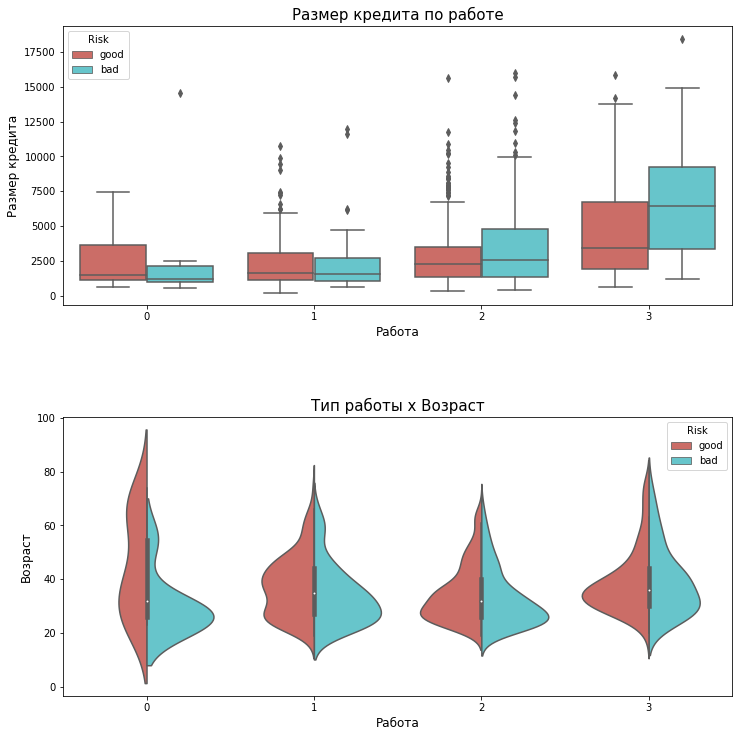

In [21]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Размер кредита по работе", fontsize=15)
g1.set_xlabel("Работа", fontsize=12)
g1.set_ylabel("Размер кредита", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Тип работы x Возраст", fontsize=15)
g2.set_xlabel("Работа", fontsize=12)
g2.set_ylabel("Возраст", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Посмотрим на распределение по размеру кредита Looking the distribuition of Credit Amont

In [22]:
#!pip uninstall tornado
#!pip install tornado==4.5.3

import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
fig.show(renderer='colab')
#py.iplot(fig, filename='Distplot with Multiple Datasets')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



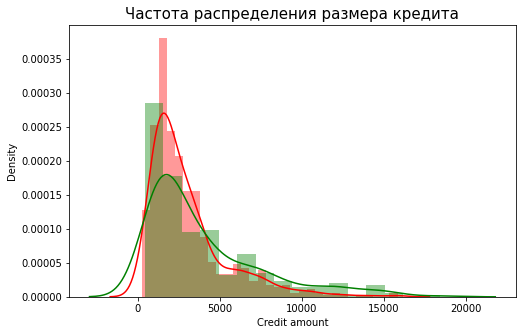

In [23]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Частота распределения размера кредита", fontsize=15)
plt.show()

Распределение сберегательных счетов по риску Distruibution of Saving accounts by Risk

In [26]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Количество сбер. счетов','Размер кредита по сбер. счетам', 
                                          'Возраст по сберегательным аккаунтам'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Исследование сберегательных счетов', boxmode='group')
fig.show(renderer='colab')

#py.iplot(fig, filename='combined-savings')


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Как улучшить легенду? Я пытаюсь заменить график выше, и как я могу использовать violinplot в plotly? How can I better configure the legends?  I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


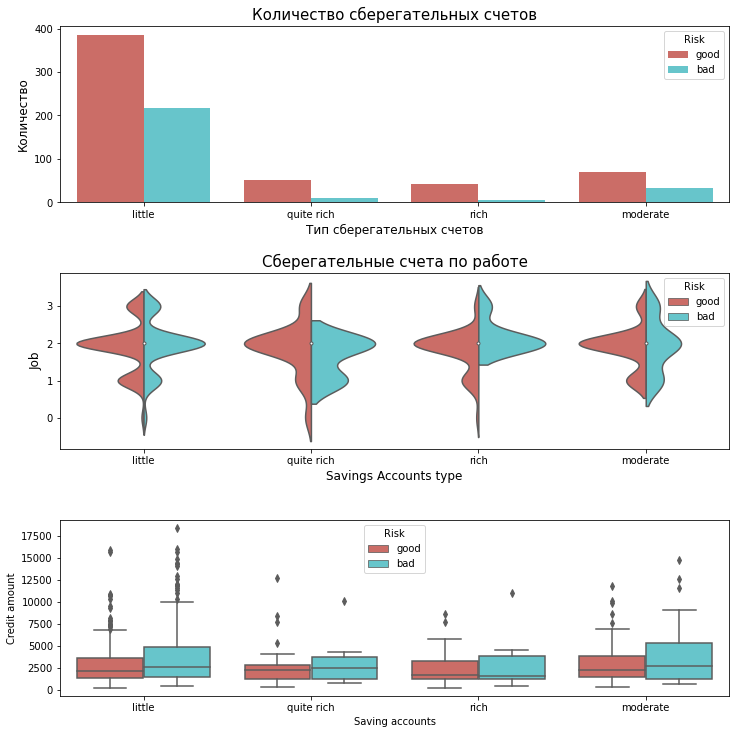

In [27]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Количество сберегательных счетов", fontsize=15)
g.set_xlabel("Тип сберегательных счетов", fontsize=12)
g.set_ylabel("Количество", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Сберегательные счета по работе", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Сберегательные счета по размеру кредита", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Красивое и интеренсное распределение Pretty and interesting distribution...

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


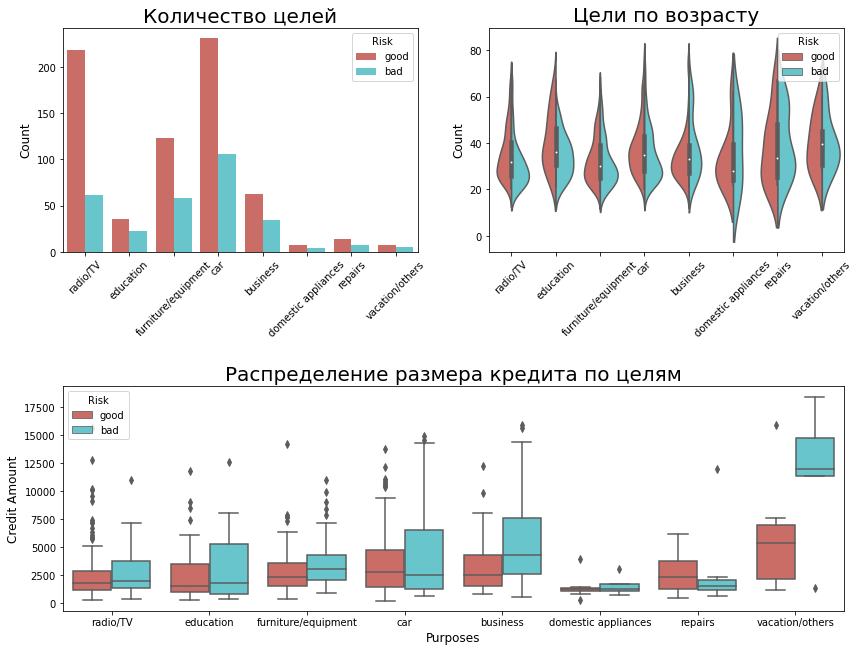

In [28]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Количество целей", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Цели по возрасту", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Распределение размера кредита по целям", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Длительность заема Duration of the loans distribuition and density

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



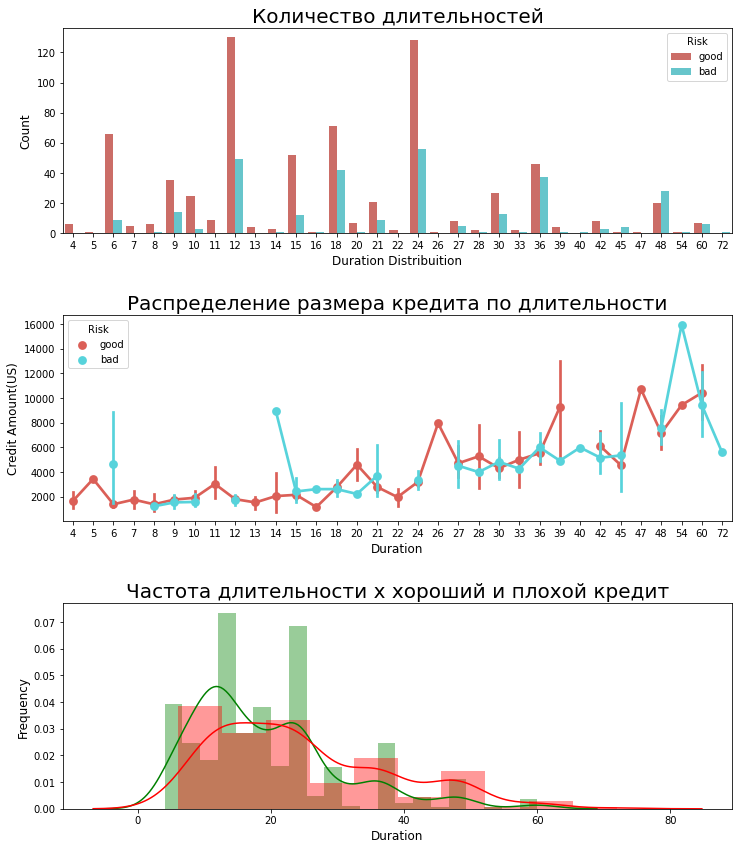

In [29]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Количество длительностей", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Распределение размера кредита по длительности", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Частота длительности x хороший и плохой кредит", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Интересно, мы видим, что наибольшая длительность имеет большой размер кредита. <br>
Наибольшая плотность распределения находится между [12 ~ 18 ~ 24] месяцами. <br>
Все это имеет значение. <br>
Interesting, we can see that the highest duration have the high amounts. <br>
The highest density is between [12 ~ 18 ~ 24] months<br>
It all make sense.


<h2>Проверка счетов Checking Account variable </h2>

Для начала посмотрим на распределение First, let's look the distribuition 

In [30]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Проверка распредления счетов',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')
#py.iplot(fig, filename = 'Age-ba', validate = False)

Сейчас проверим значения по обычным счетам Now, we will verify the values through Checking Accounts

In [31]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

#py.iplot(fig, filename='box-age-cat')

Старый график я пытаюсь заменить новым интерактивным графиком **The** old plot that I am trying to substitute with interactive plots

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


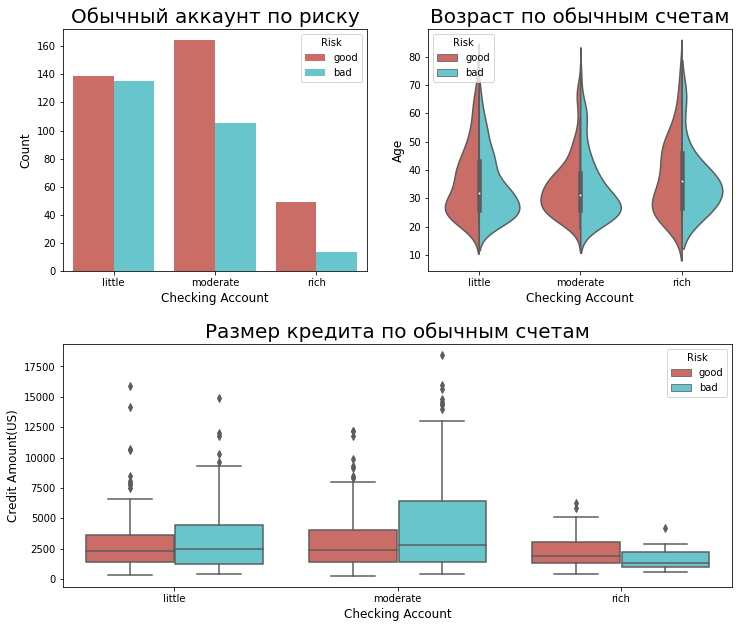

In [32]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Обычный аккаунт по риску", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Возраст по обычным счетам", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Размер кредита по обычным счетам", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Перекрестная таблица для исследования данных немного глубже Crosstab session and anothers to explore our data by another metrics a little deep

In [33]:
pd.crosstab(df_credit.Sex, df_credit.Job)

Job,0,1,2,3
Sex,,,,
female,12,64,197,37
male,10,136,433,111


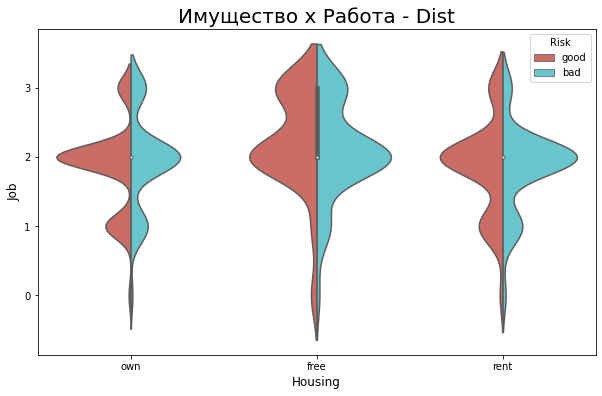

In [34]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Имущество x Работа - Dist", fontsize=20)

plt.show()

In [35]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [37]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


## Посмотрим общее значение в каждой категории Looking the total of values in each categorical feature

In [38]:
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Young
996,40,male,3,own,little,little,3857,30,car,good,Adult
997,38,male,2,own,little,NaN,804,12,radio/TV,good,Adult
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Student


In [40]:
print("Цель : ",df_credit.Purpose.unique())
print("Пол : ",df_credit.Sex.unique())
print("Имущество : ",df_credit.Housing.unique())
print("Сберегательные счета : ",df_credit['Saving accounts'].unique())
print("Риск : ",df_credit['Risk'].unique())
print("Обычные счета : ",df_credit['Checking account'].unique())
print("Возрастная категория : ",df_credit['Age_cat'].unique())

Цель :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Пол :  ['male' 'female']
Имущество :  ['own' 'free' 'rent']
Сберегательные счета :  [nan 'little' 'quite rich' 'rich' 'moderate']
Риск :  ['good' 'bad']
Обычные счета :  ['little' 'moderate' nan 'rich']
Возрастная категория :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


## Давайте сделаем некоторые расчеты по этим значениям и создадим переменную Dummies Let's do some feature engineering on this values and create variable Dummies of the values

In [41]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

## Трансформация данных в Dummy Transforming the data into Dummy variables

In [42]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

# Удалаяем старые features Deleting the old features

In [43]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

In [44]:
df_credit

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1,22,2,5951,48,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
2,49,1,2096,12,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,53,2,4870,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
996,40,3,3857,30,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
997,38,2,804,12,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
998,23,2,1845,45,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


# **5. Корреляция Correlation:** <a id="Correlation"></a> <br>
- Посмотрим на корреляцию данных Looking the data correlation
<h1>Посмотрим на корреляцию данных Looking the correlation of the data

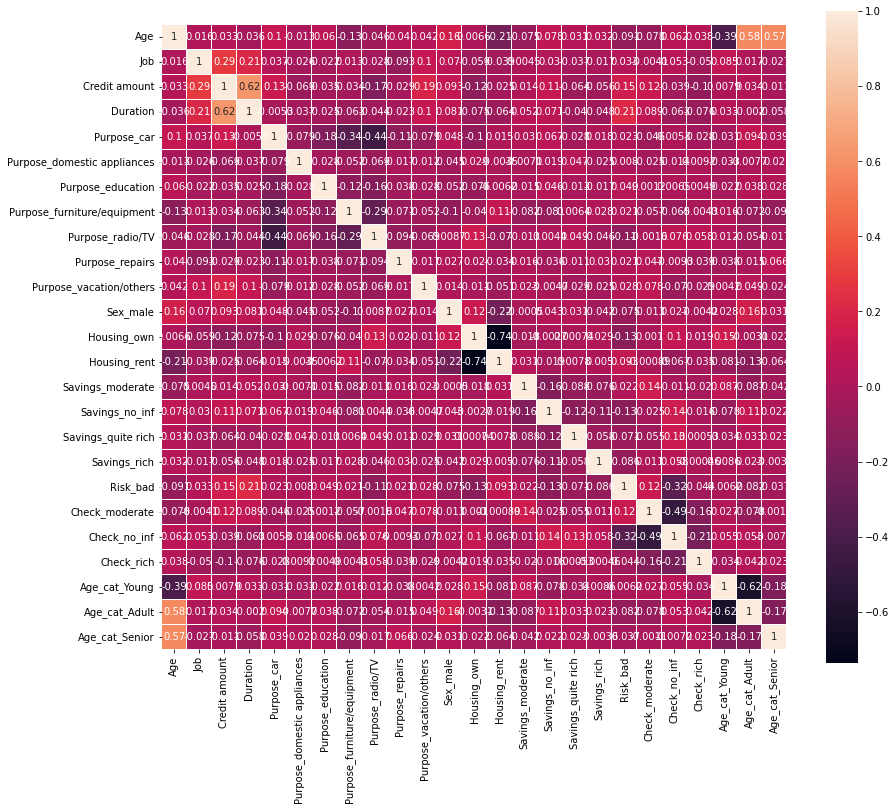

In [45]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Импорт библиотек машинного обучения Importing ML librarys
- Задаем переменные X и Y для предсказания Setting X and y variables to the prediction
- Разделение данных Splitting Data


In [46]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [47]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [48]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
   

LR: 0.387574 (0.077970)
LDA: 0.428815 (0.093162)
KNN: 0.263130 (0.035560)
CART: 0.545842 (0.101529)
NB: 0.596300 (0.081365)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



RF: 0.383644 (0.055798)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



SVM: 0.182230 (0.088462)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



XGB: 0.422917 (0.110550)


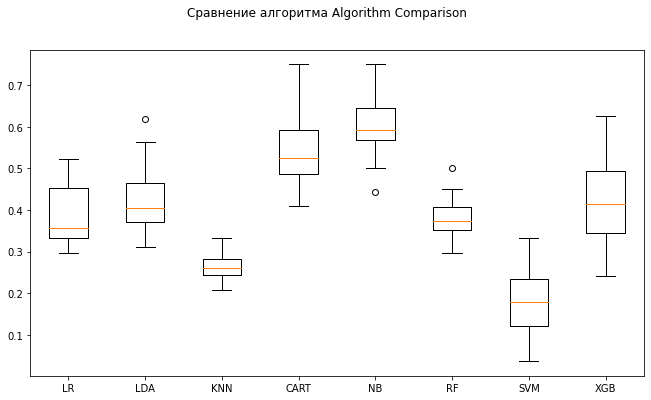

In [50]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Сравнение алгоритма Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Очень интересно. Почти все модели показывают низкое значение to recall. 
Мы можем видеть, что лучшие результат получены с CART, NB, и XGBoost.
Я выполню некоторые модели и постараюст сделать простой Tunning <br> 
Very interesting. Almost all models shows a low value to recall. 
We can observe that our best results was with CART, NB and XGBoost. <br>
I will implement some models and try to do a simple Tunning on them

# **7.1 Модель 1:** <a id="Modelling 1"></a> <br>
- Использование Случайного Леса для предсказания кредитного рейтинга Using Random Forest to predictict the credit score 
- Некоторые Параметры Валидации Some of Validation Parameters

In [51]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3, 5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.111, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.065, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.196, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.087, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.044, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.067, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.022, total=   0.1s
[CV] max_depth=3, max

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   51.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [52]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.508792270531401
{'max_depth': None, 'max_features': 20, 'n_estimators': 3}


In [53]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [54]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.736


[[158  20]
 [ 46  26]]


0.3892215568862275


Очень плохие результаты! Как исправить мою модель? Very sucks results! How can I increase my model? 

# **7.2 Модель 2:** <a id="Modelling 2"></a> <br>

In [55]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [56]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [57]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.7053333333333334


In [58]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.648


[[124  54]
 [ 34  38]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.53      0.46        72

    accuracy                           0.65       250
   macro avg       0.60      0.61      0.60       250
weighted avg       0.68      0.65      0.66       250



# C моделью Гаусса мы поличили лучший ответ With the Gaussian Model we got a best recall.

## Давайте проверим кривую ROC Let's verify the ROC curve

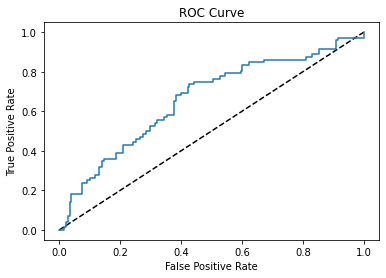

In [59]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [61]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7066666666666668


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [62]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.72


[[149  29]
 [ 41  31]]


0.44540229885057464


## Выполение пайпланйа модели  Implementing a pipeline of models 

In [63]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],

Как избежать этого How can I avoid of this 

# Пожалуйста, как я могу улучшить эти модели? Please, how can I increase this sucks models ?

In [64]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'subsample': 0.85}

In [65]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.756


[[157  21]
 [ 40  32]]
